# -------- Maze Solver Using Q-Learning Algorithm --------

## Importing Libraries

In [22]:
import numpy as np
import math

## Setting Variables

In [71]:
Source = 16 
Target = 239
total_state = 256 
size = total_state
sub_size = int(size**(1/2))
gamma = 1
learning_rate = .5
total_epochs = 2500

Wall=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 22, 29, 31, 32, 33, 34, 36, 38, 40, 42, 43, 44, 45, 47, 48, 52, 54, 56, 63, 64, 66, 67, 68, 70, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 88, 95, 96, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 120, 126, 127, 128, 131, 132, 134, 136, 138, 140, 143, 144, 145, 150, 152, 154, 156, 157, 159, 160, 163, 164, 166, 170, 175, 176, 177, 182, 184, 186, 188, 189, 191, 192, 195, 196, 198, 199, 200, 202, 204, 207, 208, 209, 212, 214, 218, 221, 222, 223, 224, 227, 230, 232, 235, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255]


## Defining Functions

In [72]:
def valid_adj_cell(rcell, ccell, M, A):
    adj_cell = [(0,1),(0,-1),(1,0),(-1,0)]
    valid_cell=[]
    row_len = len(M)-1
    col_len = len(M[0])-1
    
    if ccell== 0:
        adj_cell = [(0,1),(1,0),(-1,0)]
    if ccell == col_len:
        adj_cell =[(0,-1),(1,0),(-1,0)]
    if rcell == 0:
        adj_cell = [(0,1),(0,-1),(1,0)]
    if rcell == row_len:
        adj_cell = [(0,1),(0,-1),(-1,0)]
    if ccell == 0 and rcell == 0:
        adj_cell =[(0,1),(1,0)]
    if ccell == 0 and rcell == row_len:
        adj_cell =[(0,1),(-1,0)]
    if ccell == col_len and rcell == 0:
        adj_cell =[(0,-1),(1,0)]
    if ccell == col_len and rcell == row_len:
        adj_cell =[(0,-1),(-1,0)]    
        

    
    for cell_pos in adj_cell:            
        new_state =A[rcell + cell_pos[0]][ccell + cell_pos[1]]
        valid_cell.append(new_state)
    return valid_cell


def next_available_states(st, Maze, total_state):
  state_array = []
  for i in range(total_state):
    if Maze[st,i] == 1: 
      state_array.append(i)
  return state_array

def random_next_state(st, Maze, total_state):

  avail_state_array = next_available_states(st, Maze, total_state)
  length_avail_state_array = len(avail_state_array)
  rand_next_state = avail_state_array[np.random.randint(0, length_avail_state_array)]
  return rand_next_state 



def Algo_q_learing(Maze, Reward, Q_matrix, gamma, learning_rate, Target, total_state, max_epochs, Wall):
  
  for i in range(0,max_epochs):
    present_state = np.random.randint(0,total_state)
    check_presest_state= present_state not in Wall
    if present_state == True:

      while(True):
        next_state = random_next_state(present_state, Maze, total_state)
        available_next_state_array = next_available_states(next_state, Maze, total_state)

        maxQ = -9999.99
        for j in range(len(available_next_state_array)):
          get_s = available_next_state_array[j]
          q = Q_matrix[next_state,get_s]
          if q > maxQ:
            maxQ = q

        Q_matrix[present_state][next_state] = (Reward[present_state][next_state] + (gamma * maxQ))
        #Q_matrix[present_state][next_state] = Q_matrix[present_state][next_state]+ learning_rate*(Reward[present_state][next_state] + (gamma * maxQ))


        present_state = next_state
        if next_state == Target: 
          break 
    else:
     i+=1



def Stored_path(Source, Target, Q_matrix):
  path_array =[]
  present_state = Source
  path_array.append(present_state)
  #print(str(present_state) + "+", end="")
  #print(Q_matrix)
  while present_state != Target:
    next = np.argmax(Q_matrix[present_state])
    #print(str(next) + "+", end="")
    #print(next)
    present_state = next
    path_array.append(present_state)
  return path_array


def copy_solved_maze(path, M, A, sub_size):
  ans =np.zeros(shape=[sub_size, sub_size], dtype=np.int)
  for i in range(len(M)):
    for j in range(len(M[i])):
      cnode= M[i][j]
      cstate=A[i][j]
      check_cstate= cstate in path
      if check_cstate == True:
        ans[i][j] = 5
      else:
        ans[i][j] = M[i][j]
    
  return ans  


def Show_solved_maze(path, M, A):
  for i in range(len(M)):
    for j in range(len(M[i])):
      cnode= M[i][j]
      cstate=A[i][j]
      check_cstate= cstate in path
      if check_cstate == True:
        print("P", end=' ')
      else:
        print(cnode, end=' ')
    print ("\n")
    
def get_maze():
    maze = ""
    for i in range(size):
        maze = maze + ('-99' if i in Wall else "0") + (";" if (i+1)%sub_size == 0 and i!=0 else "") + " "
    maze = maze[:-2]
    M= np.array(np.mat(maze))
    return M

def get_maze_with_state_position():
    mat = ""
    for i in range(size):
        mat = mat + str(i) + (";" if (i+1)%sub_size == 0 and i!=0 else "") + " "
    mat = mat[:-2]
    A= np.array(np.mat(mat))
    return A 

def get_maze_table():
    #the maze, 0 means wall, 1 means the path
    M= get_maze()
    #print(M)
    #defining the maze grid with state positions
    A= get_maze_with_state_position()
    Maze = np.zeros(shape=[size, size], dtype=np.int)
    for i in range(len(M)):
        for j in range(len(M[i])):
            valid_state= valid_adj_cell(i, j, M, A)
            #print(valid_state)
            for k in valid_state:
                check_k = k not in Wall
                if check_k == True:
                    p_st = A[i][j]
                    Maze[p_st, k] = 1
                    #print(Maze[p_st, k])
                else:
                    k+=1
    Maze[Target, Target] = 1;
    return Maze

def get_reward_table():
    #the maze, 0 means wall, 1 means the path
    M= get_maze()
    #defining the maze grid with state positions
    A= get_maze_with_state_position()
    
    Reward = np.zeros(shape=[size, size], dtype=np.float32) 
    for i in range(len(M)):
      for j in range(len(M[i])):
          c_node = A[i][j]
          check_c_node = c_node not in Wall
          if check_c_node == True:
              valid_state= valid_adj_cell(i, j, M, A)
              #print(valid_state)
              for k in valid_state:
                  check_k = k not in Wall
                  if check_k == True:
                      p_st = A[i][j]
                      if k == Target:
                          Reward[p_st, k] = 10
                      else:
                          Reward[p_st, k] = -0.1
                      #print(Maze[p_st, k])
                  else:
                      k+=1
    return Reward

## Main Program

In [73]:
Maze=get_maze_table()
Reward = get_reward_table()   
Q_matrix = np.zeros(shape=[size, size], dtype=np.float32)  

Algo_q_learing(Maze, Reward, Q_matrix, gamma, learning_rate, Target, total_state , total_epochs, Wall)
path = Stored_path(Source, Target, Q_matrix)
print("Path")
print(path)


Path
[16, 17, 18, 19, 20, 21, 37, 53, 69, 85, 84, 83, 99, 98, 97, 113, 129, 130, 146, 147, 148, 149, 133, 117, 118, 119, 135, 151, 167, 168, 169, 153, 137, 121, 122, 123, 139, 155, 171, 187, 203, 219, 220, 236, 237, 238, 239]


## Visualizing the Output

<IPython.core.display.Javascript object>


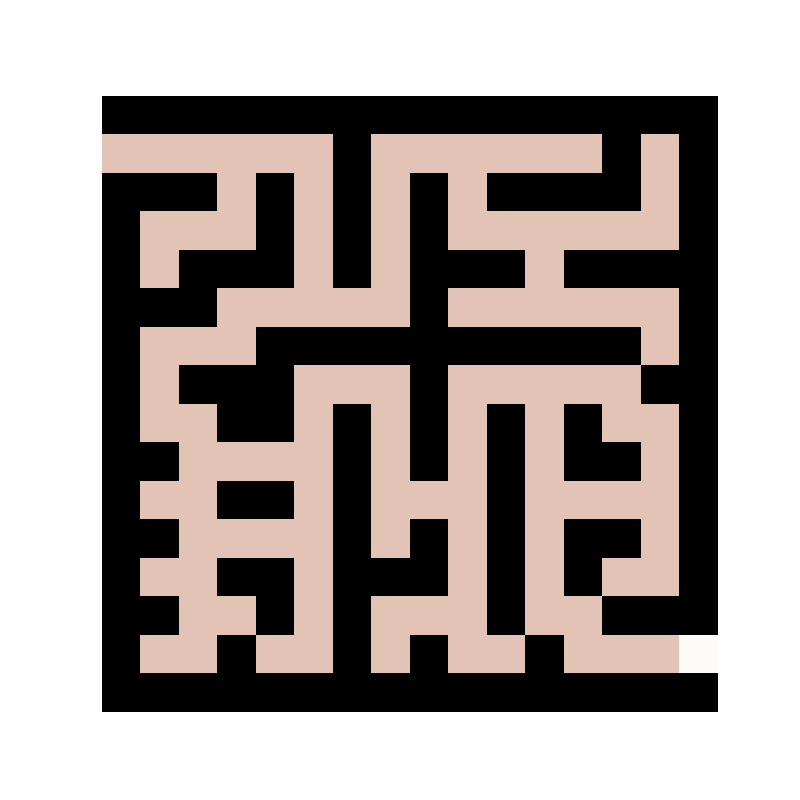

In [74]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

M= get_maze()
A= get_maze_with_state_position()

Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='Me'), bitrate=18000)


def get_solution_array():
    N=M.copy()
    k=0
    st=path[k]
    for i in range(len(N)):
        for j in range(len(N[i])):
            if st in path and st==A[i][j]:
                N[i][j]=M[i][j]+10
    del path[0]
    return N

def update(data):
    mat.set_data(data)
    return mat 

def data_gen():
    while len(path)>0:
        yield get_solution_array()

fig, ax = plt.subplots(figsize=(8, 8))
k=0

mat = ax.matshow(get_solution_array(), cmap='gist_earth')
#plt.colorbar(mat)
ani = animation.FuncAnimation(fig, update, data_gen, interval=1000,
                              save_count=5000)
plt.axis('off')
plt.show()

ani.save('animation_maze_q_learning_epoch_2500.mp4',  writer=writer)
